## **백내장**

https://www.kaggle.com/datasets/nandanp6/cataract-image-dataset

In [1]:
from glob import glob
import os 

root = './datasets/eyes/original'

directories =  glob(os.path.join(root, '*'))
directory_names = []

for directory in directories:
    directory_names.append(directory[directory.rindex('\\') +1:])

print(directory_names)

['cataract', 'normal']


In [2]:
root = './datasets/eyes/original/'

for name in directory_names:
    for i, file_name in enumerate(os.listdir(os.path.join(root, name))):
        old_file = os.path.join(root+ name + '/' ,file_name)
        new_file = os.path.join(root+ name + '/' , name + str(i+1) +'.png')

        os.rename(old_file, new_file)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_data_generator = ImageDataGenerator(rescale=1./255)
generator = image_data_generator.flow_from_directory(root, target_size=(244,244), batch_size=8, class_mode='binary')
print(generator.class_indices)

Found 608 images belonging to 2 classes.
{'cataract': 0, 'normal': 1}


In [4]:
import pandas as pd
c_df = pd.DataFrame({'file_paths': generator.filepaths, 'targets':generator.classes})
c_df

,file_paths,targets
0,./datasets/eyes/original/cataract\cataract1.png,0
1,./datasets/eyes/original/cataract\cataract10.png,0
2,./datasets/eyes/original/cataract\cataract100.png,0
3,./datasets/eyes/original/cataract\cataract101.png,0
4,./datasets/eyes/original/cataract\cataract102.png,0
...,...,...
603,./datasets/eyes/original/normal\normal95.png,1
604,./datasets/eyes/original/normal\normal96.png,1
605,./datasets/eyes/original/normal\normal97.png,1
606,./datasets/eyes/original/normal\normal98.png,1


In [5]:
c_df.loc[:, 'file_paths'] = c_df.file_paths.apply(lambda x: x.replace('\\','/')).reset_index(drop=True)
display(c_df)

,file_paths,targets
0,./datasets/eyes/original/cataract/cataract1.png,0
1,./datasets/eyes/original/cataract/cataract10.png,0
2,./datasets/eyes/original/cataract/cataract100.png,0
3,./datasets/eyes/original/cataract/cataract101.png,0
4,./datasets/eyes/original/cataract/cataract102.png,0
...,...,...
603,./datasets/eyes/original/normal/normal95.png,1
604,./datasets/eyes/original/normal/normal96.png,1
605,./datasets/eyes/original/normal/normal97.png,1
606,./datasets/eyes/original/normal/normal98.png,1


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(c_df.file_paths, c_df.targets, stratify=c_df.targets, test_size=0.2, random_state=124)

print(y_train.value_counts())
print(y_test.value_counts())

targets
1    243
0    243
Name: count, dtype: int64
targets
0    61
1    61
Name: count, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

print(y_train.value_counts())
print(y_val.value_counts())

targets
0    194
1    194
Name: count, dtype: int64
targets
1    49
0    49
Name: count, dtype: int64


In [8]:
import shutil

root = './datasets/eyes/'

for file_path in X_train:
    animal_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'train/' + animal_dir)

    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

In [9]:
import shutil

root = './datasets/eyes/'

for file_path in X_val:
    animal_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'validation/' + animal_dir)

    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

In [10]:
import shutil

root = './datasets/eyes/'

for file_path in X_test:
    animal_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'test/' + animal_dir)

    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/eyes/train'
validation_dir = './datasets/eyes/validation'
test_dir = './datasets/eyes/test'

train_data_generator = ImageDataGenerator(rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 388 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Found 122 images belonging to 2 classes.
{'cataract': 0, 'normal': 1}
{'cataract': 0, 'normal': 1}
{'cataract': 0, 'normal': 1}


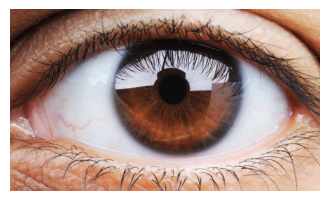

In [12]:
import cv2
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread(train_generator.filepaths[200]), cv2.COLOR_BGR2RGB)

def show_image(image):
    plt.figure(figsize=(4, 4))
    plt.imshow(image)
    plt.axis('off')
    
show_image(image)

## **1Cycle**

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(100, activation='relu')(x)
x = Dropout(rate=0.3)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 244, 244, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 244, 244, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 122, 122, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 122, 122, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 238144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 238144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │      23,814,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,927,177 (91.27 MB)

 Trainable params: 23,927,177 (91.27 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

In [189]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [5]:
history = model.fit(
    train_generator,
    batch_size=16,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb, ely_cb]
)

Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 946ms/step - acc: 0.5518 - loss: 1.0389 - val_acc: 0.7041 - val_loss: 0.6037 - learning_rate: 0.0010
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 45s 891ms/step - acc: 0.7375 - loss: 0.5426 - val_acc: 0.7959 - val_loss: 0.4075 - learning_rate: 0.0010
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 45s 897ms/step - acc: 0.8149 - loss: 0.4240 - val_acc: 0.8163 - val_loss: 0.4190 - learning_rate: 0.0010
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 45s 900ms/step - acc: 0.8627 - loss: 0.3652 - val_acc: 0.8367 - val_loss: 0.3328 - learning_rate: 0.0010
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 46s 917ms/step - acc: 0.8631 - loss: 0.3751 - val_acc: 0.8980 - val_loss: 0.2696 - learning_rate: 0.0010
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 46s 919ms/step - acc: 0.8969 - loss: 0.2788 - val_acc: 0.8980 - val_loss: 0.2692 - learning_rate: 0.0010
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 46s 932ms/step - acc: 0.9391 - loss: 0.2346 - val_acc: 0.9082 - val_loss: 0.2430 - learning_rate: 0.0010
Epoch 8/20

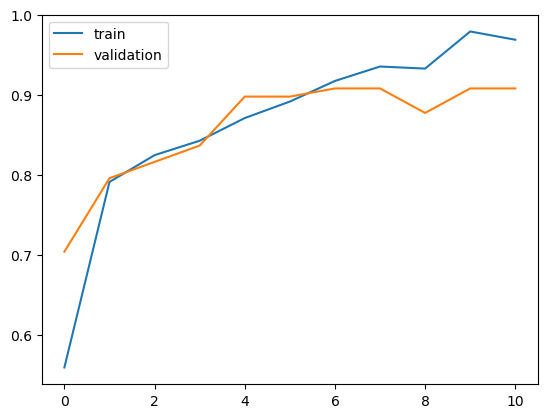

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()

In [13]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_generator, batch_size=8)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - acc: 0.9476 - loss: 0.3211


[0.44539594650268555, 0.9344262480735779]

검증 정확도가 줄고 검증 손실이 증가하여 과적합이 발생했다고 판단합니다.  
첫번째로 이미지 증강을 통해 학습량을 늘려봅니다.  

## **2Cycle**

In [15]:
import albumentations as A

def transform(image):
    aug = A.Compose([
        # 좌우반전
        A.HorizontalFlip(p=0.5),
        # 상하반전
        A.VerticalFlip(p=0.5),
        # 90도 회전
        A.RandomRotate90(p=0.5),
    ], p=0.5)

    return aug(image=image)['image']

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/eyes/train'
validation_dir = './datasets/eyes/validation'
test_dir = './datasets/eyes/test'

train_data_generator = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 388 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Found 122 images belonging to 2 classes.
{'cataract': 0, 'normal': 1}
{'cataract': 0, 'normal': 1}
{'cataract': 0, 'normal': 1}


In [17]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)

x = Dense(100, activation='relu')(x)
x = Dropout(rate=0.3)(x)

output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 244, 244, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 244, 244, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 122, 122, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 122, 122, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 238144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 238144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │      23,814,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,927,177 (91.27 MB)

 Trainable params: 23,927,177 (91.27 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

In [19]:
history = model.fit(
    train_generator,
    batch_size=16,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb, ely_cb]
)

Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 48s 923ms/step - acc: 0.4738 - loss: 0.9183 - val_acc: 0.7041 - val_loss: 0.6362 - learning_rate: 0.0010
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 46s 900ms/step - acc: 0.7300 - loss: 0.5749 - val_acc: 0.7449 - val_loss: 0.5240 - learning_rate: 0.0010
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 47s 925ms/step - acc: 0.7796 - loss: 0.5615 - val_acc: 0.8469 - val_loss: 0.4318 - learning_rate: 0.0010
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 47s 928ms/step - acc: 0.8209 - loss: 0.4521 - val_acc: 0.8469 - val_loss: 0.4251 - learning_rate: 0.0010


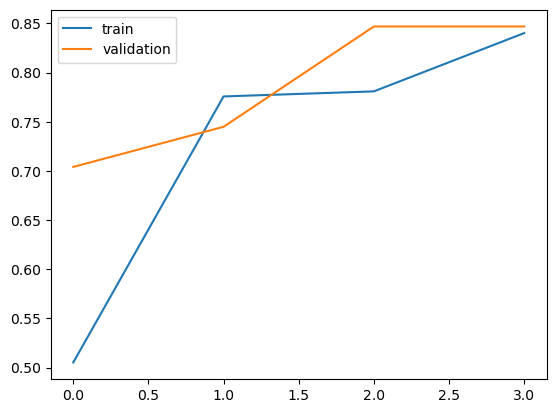

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()

In [21]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_generator, batch_size=8)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - acc: 0.8882 - loss: 0.3634


[0.3857593536376953, 0.8934426307678223]

In [ ]:
이미지 증강을 통해 데이터를 증강시킨 결과 과적합이 해소됐지만 정확도가 전체적으로 떨어져 정확도를 상승시켜봅니다.
데이터가 증가했으므로 층을 더 쌓고 필터의 수를 늘려 다양한 특징을 학습할 수 있도록 해봅니다.

## **3Cycle**

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/eyes/train'
validation_dir = './datasets/eyes/validation'
test_dir = './datasets/eyes/test'

train_data_generator = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 388 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Found 122 images belonging to 2 classes.
{'cataract': 0, 'normal': 1}
{'cataract': 0, 'normal': 1}
{'cataract': 0, 'normal': 1}


In [36]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)

x = Dense(100, activation='relu')(x)
x = Dropout(rate=0.3)(x)

output = Dense(1, activation='sigmoid')(x)


model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 244, 244, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 244, 244, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 122, 122, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 122, 122, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 61, 61, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 61, 61, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 61, 61, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 230400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 230400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 100)                 │      23,040,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,185,609 (92.26 MB)

 Trainable params: 24,185,609 (92.26 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

In [29]:
history = model.fit(
    train_generator,
    batch_size=16,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb, ely_cb]
)

Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - acc: 0.5151 - loss: 0.7054 - val_acc: 0.5000 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - acc: 0.4871 - loss: 0.6931 - val_acc: 0.5000 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - acc: 0.5187 - loss: 0.6929 - val_acc: 0.5000 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - acc: 0.4744 - loss: 0.6938 - val_acc: 0.5000 - val_loss: 0.6931 - learning_rate: 1.0000e-04


정확도가 떨어지면서 학습이 중단되었습니다.  
이미지 수를 너무 줄인 것이라 판단되어 이미지를 60으로 그대로 유지한 상태로 다시 학습해봅니다.  

## **4Cycle**

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/eyes/train'
validation_dir = './datasets/eyes/validation'
test_dir = './datasets/eyes/test'

train_data_generator = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 388 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Found 122 images belonging to 2 classes.
{'cataract': 0, 'normal': 1}
{'cataract': 0, 'normal': 1}
{'cataract': 0, 'normal': 1}


In [55]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
# x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(100, activation='relu')(x)
x = Dropout(rate=0.3)(x)
output = Dense(1, activation='sigmoid')(x)


model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_66 (Conv2D)                   │ (None, 244, 244, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_67 (Conv2D)                   │ (None, 244, 244, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_68 (Conv2D)                   │ (None, 122, 122, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_69 (Conv2D)                   │ (None, 122, 122, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 61, 61, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_70 (Conv2D)                   │ (None, 61, 61, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_71 (Conv2D)                   │ (None, 61, 61, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 952576)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 952576)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 100)                 │      95,257,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,403,209 (367.75 MB)

 Trainable params: 96,403,209 (367.75 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

In [57]:
history = model.fit(
    train_generator,
    batch_size=16,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb, ely_cb]
)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - acc: 0.4958 - loss: 1.0912 - val_acc: 0.5000 - val_loss: 0.7075 - learning_rate: 0.0010
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - acc: 0.4717 - loss: 0.7040 - val_acc: 0.5000 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 3/20
 3/49 ━━━━━━━━━━━━━━━━━━━━ 1:23 2s/step - acc: 0.5694 - loss: 0.6894

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()

In [ ]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_generator, batch_size=8)

검증데이터의 정확도가 0.5 로 랜덤으로 나온다고 판단했습니다.  
파라미터 수를 최소화 하기 위해 필터 수를 조금 줄여보도록 합니다.  

## **5Cycle**

In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/eyes/train'
validation_dir = './datasets/eyes/validation'
test_dir = './datasets/eyes/test'

train_data_generator = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 388 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Found 122 images belonging to 2 classes.
{'cataract': 0, 'normal': 1}
{'cataract': 0, 'normal': 1}
{'cataract': 0, 'normal': 1}


In [59]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
# x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(100, activation='relu')(x)
x = Dropout(rate=0.3)(x)
output = Dense(1, activation='sigmoid')(x)


model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_72 (Conv2D)                   │ (None, 244, 244, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_73 (Conv2D)                   │ (None, 244, 244, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 122, 122, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_74 (Conv2D)                   │ (None, 122, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_75 (Conv2D)                   │ (None, 122, 122, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_76 (Conv2D)                   │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_77 (Conv2D)                   │ (None, 61, 61, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 476288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 476288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 100)                 │      47,628,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,916,009 (182.79 MB)

 Trainable params: 47,916,009 (182.79 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

In [61]:
history = model.fit(
    train_generator,
    batch_size=16,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb, ely_cb]
)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 782ms/step - acc: 0.4916 - loss: 0.6918 - val_acc: 0.5000 - val_loss: 0.7861 - learning_rate: 0.0010
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 793ms/step - acc: 0.5652 - loss: 0.7022 - val_acc: 0.7755 - val_loss: 0.4844 - learning_rate: 0.0010
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 39s 771ms/step - acc: 0.6719 - loss: 0.6232 - val_acc: 0.6939 - val_loss: 0.5657 - learning_rate: 0.0010
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 39s 763ms/step - acc: 0.6784 - loss: 0.7035 - val_acc: 0.7143 - val_loss: 0.4966 - learning_rate: 0.0010


좀 더 나아지는것 같아서 유지하면서 규제를 걸어 성능을 높여보고자 합니다.  

## **6Cycle**

In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/eyes/train'
validation_dir = './datasets/eyes/validation'
test_dir = './datasets/eyes/test'

train_data_generator = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 388 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Found 122 images belonging to 2 classes.
{'cataract': 0, 'normal': 1}
{'cataract': 0, 'normal': 1}
{'cataract': 0, 'normal': 1}


In [63]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=32, kernel_size=3, padding='same', kernel_regularizer=l2(0.001), kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=3, padding='same', kernel_regularizer=l2(0.001), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.001), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.001), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.001), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.001), kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
# x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(100, activation='relu', kernel_regularizer=l2(0.001), kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)
output = Dense(1, activation='sigmoid', kernel_initializer='glorot_normal')(x)


model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_78 (Conv2D)                   │ (None, 244, 244, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 244, 244, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 244, 244, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_79 (Conv2D)                   │ (None, 244, 244, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 244, 244, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 244, 244, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 122, 122, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_80 (Conv2D)                   │ (None, 122, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 122, 122, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_81 (Conv2D)                   │ (None, 122, 122, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 122, 122, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_82 (Conv2D)                   │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 61, 61, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 61, 61, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_83 (Conv2D)                   │ (None, 61, 61, 128)         │         147,5

 Total params: 47,917,801 (182.79 MB)

 Trainable params: 47,916,905 (182.79 MB)

 Non-trainable params: 896 (3.50 KB)

In [64]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

In [65]:
history = model.fit(
    train_generator,
    batch_size=16,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb, ely_cb]
)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - acc: 0.5968 - loss: 35.2829 - val_acc: 0.5612 - val_loss: 8.2514 - learning_rate: 0.0010
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - acc: 0.7753 - loss: 5.4465 - val_acc: 0.4490 - val_loss: 2.8113 - learning_rate: 0.0010
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - acc: 0.8131 - loss: 2.4022 - val_acc: 0.5000 - val_loss: 2.5553 - learning_rate: 0.0010
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - acc: 0.8240 - loss: 2.2760 - val_acc: 0.6837 - val_loss: 2.3668 - learning_rate: 0.0010


In [67]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_generator, batch_size=8)

16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 341ms/step - acc: 0.6785 - loss: 2.3253


[2.3398191928863525, 0.688524603843689]

결과가 좋지 않았다.  
2cycle에서 이미지 증강을 했을때 층을 더 쌓지않고 핏을 한번 더 돌려서 학습을 더 해서 정확도를 올려보기로 한다.  

## **7Cycle**

In [159]:
import albumentations as A

def transform(image):
    aug = A.Compose([
        # 좌우반전
        A.HorizontalFlip(p=0.5),
        # 상하반전
        A.VerticalFlip(p=0.5),
        # 90도 회전
        A.RandomRotate90(p=0.5),
    ], p=0.5)

    return aug(image=image)['image']

In [160]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/eyes/train'
validation_dir = './datasets/eyes/validation'
test_dir = './datasets/eyes/test'

train_data_generator = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 388 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Found 122 images belonging to 2 classes.
{'cataract': 0, 'normal': 1}
{'cataract': 0, 'normal': 1}
{'cataract': 0, 'normal': 1}


In [161]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)

x = Dense(100, activation='relu')(x)
x = Dropout(rate=0.3)(x)

output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_108 (Conv2D)                  │ (None, 244, 244, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_109 (Conv2D)                  │ (None, 244, 244, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_110 (Conv2D)                  │ (None, 122, 122, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_111 (Conv2D)                  │ (None, 122, 122, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_45 (MaxPooling2D)      │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_21 (Flatten)                 │ (None, 238144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 238144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 100)                 │      23,814,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,927,177 (91.27 MB)

 Trainable params: 23,927,177 (91.27 MB)

 Non-trainable params: 0 (0.00 B)

In [162]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

In [163]:
history = model.fit(
    train_generator,
    batch_size=16,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb, ely_cb]
)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 49s 927ms/step - acc: 0.5181 - loss: 1.8384 - val_acc: 0.5000 - val_loss: 0.6922 - learning_rate: 0.0010
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 46s 914ms/step - acc: 0.5430 - loss: 0.6934 - val_acc: 0.6224 - val_loss: 0.7879 - learning_rate: 0.0010
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 46s 923ms/step - acc: 0.5817 - loss: 0.6608 - val_acc: 0.7959 - val_loss: 0.4973 - learning_rate: 0.0010
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 46s 921ms/step - acc: 0.7990 - loss: 0.6597 - val_acc: 0.8265 - val_loss: 0.4520 - learning_rate: 0.0010


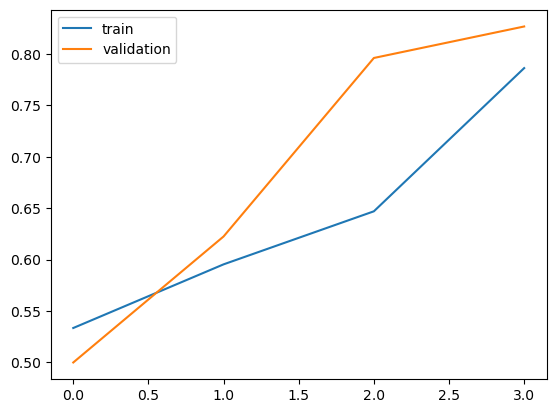

In [164]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()

In [165]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_generator, batch_size=8)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - acc: 0.8700 - loss: 0.4802


[0.48216119408607483, 0.8360655903816223]

In [166]:
history = model.fit(
    train_generator,
    batch_size=16,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb, ely_cb]
)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 47s 925ms/step - acc: 0.8194 - loss: 0.4898 - val_acc: 0.8163 - val_loss: 0.3844 - learning_rate: 0.0010
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 47s 931ms/step - acc: 0.8525 - loss: 0.4485 - val_acc: 0.8163 - val_loss: 0.3582 - learning_rate: 0.0010
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 47s 933ms/step - acc: 0.8624 - loss: 0.4090 - val_acc: 0.8571 - val_loss: 0.3225 - learning_rate: 0.0010
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 46s 914ms/step - acc: 0.8784 - loss: 0.2992 - val_acc: 0.8571 - val_loss: 0.3284 - learning_rate: 0.0010


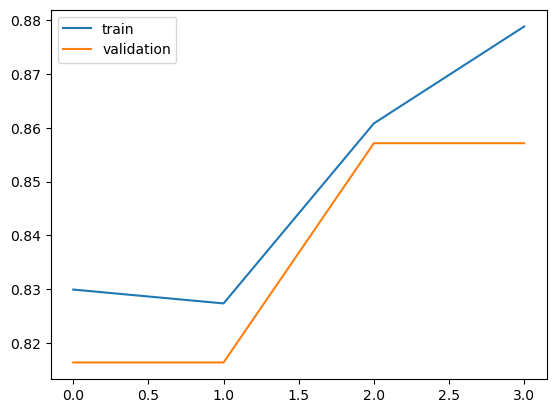

In [167]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()

In [168]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_generator, batch_size=8)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - acc: 0.8765 - loss: 0.3392


[0.3077881634235382, 0.8852459192276001]

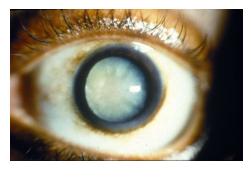

In [180]:
import cv2
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread(train_generator.filepaths[100]), cv2.COLOR_BGR2RGB)

show_image(image)

In [181]:
import numpy as np

resized_image = cv2.resize(image, (244, 244))
# 이미지 배열에 새로운 차원을 추가
resized_image = np.expand_dims(resized_image, axis=0)

# 클래스 이름 지정
class_names = ['cataract', 'nomal']
# 모델 예측 후 예측된 클래스에 해당하는 클래스명을 가져와 출력
predicted_probabilities = model.predict(resized_image, batch_size=8)[0]
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = class_names[predicted_class_index]

print(predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
cataract


## **8Cycle**

In [185]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/eyes/train'
validation_dir = './datasets/eyes/validation'
test_dir = './datasets/eyes/test'

train_data_generator = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=8,
    class_mode='binary'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 388 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Found 122 images belonging to 2 classes.
{'cataract': 0, 'normal': 1}
{'cataract': 0, 'normal': 1}
{'cataract': 0, 'normal': 1}


In [186]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)

x = Dense(100, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(rate=0.3)(x)

output = Dense(1, activation='sigmoid', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_24 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_120 (Conv2D)                  │ (None, 244, 244, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 244, 244, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_22 (Activation)           │ (None, 244, 244, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_121 (Conv2D)                  │ (None, 244, 244, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 244, 244, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_23 (Activation)           │ (None, 244, 244, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_50 (MaxPooling2D)      │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_122 (Conv2D)                  │ (None, 122, 122, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 122, 122, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_24 (Activation)           │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_123 (Conv2D)                  │ (None, 122, 122, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 122, 122, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_25 (Activation)           │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_24 (Flatten)                 │ (None, 238144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 238144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 100)                 │      23,814,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 23,928,201 (91.28 MB)

 Trainable params: 23,927,689 (91.28 MB)

 Non-trainable params: 512 (2.00 KB)

In [190]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

In [191]:
history = model.fit(
    train_generator,
    batch_size=16,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[mcp_cb, rlr_cb, ely_cb]
)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - acc: 0.8234 - loss: 0.5987 - val_acc: 0.8469 - val_loss: 0.3278 - learning_rate: 0.0010
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - acc: 0.8309 - loss: 0.3844 - val_acc: 0.7653 - val_loss: 0.9962 - learning_rate: 0.0010
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - acc: 0.7517 - loss: 0.6500 - val_acc: 0.8673 - val_loss: 0.3296 - learning_rate: 0.0010
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - acc: 0.8849 - loss: 0.2758 - val_acc: 0.9082 - val_loss: 0.1952 - learning_rate: 1.0000e-04
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - acc: 0.9050 - loss: 0.2597 - val_acc: 0.9082 - val_loss: 0.2243 - learning_rate: 1.0000e-04
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - acc: 0.9167 - loss: 0.2250 - val_acc: 0.9082 - val_loss: 0.1990 - learning_rate: 1.0000e-04
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - acc: 0.8988 - loss: 0.2292 - val_acc: 0.9082 - val_loss: 0.1870 - learning_rate: 1.0000e-05
Epoc

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()

In [ ]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_generator, batch_size=8)

In [ ]:
# 이미지 출력 함수 선언
def show_image(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread(train_generator.filepaths[100]), cv2.COLOR_BGR2RGB)

show_image(image)

In [ ]:
import numpy as np

resized_image = cv2.resize(image, (244, 244))
# 이미지 배열에 새로운 차원을 추가
resized_image = np.expand_dims(resized_image, axis=0)

# 클래스 이름 지정
class_names = ['cataract', 'nomal']
# 모델 예측 후 예측된 클래스에 해당하는 클래스명을 가져와 출력
predicted_probabilities = model.predict(resized_image, batch_size=8)[0]
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = class_names[predicted_class_index]

print(predicted_class_name)

In [ ]:
import cv2
import matplotlib.pyplot as plt

nomal_image = cv2.cvtColor(cv2.imread(train_generator.filepaths[205]), cv2.COLOR_BGR2RGB)

show_image(nomal_image)

In [ ]:
import numpy as np

resized_image = cv2.resize(nomal_image, (244, 244))
# 이미지 배열에 새로운 차원을 추가
resized_image = np.expand_dims(resized_image, axis=0)

# 클래스 이름 지정
class_names = ['cataract', 'nomal']
# 모델 예측 후 예측된 클래스에 해당하는 클래스명을 가져와 출력
predicted_probabilities = model.predict(resized_image, batch_size=8)[0]
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = class_names[predicted_class_index]

print(predicted_class_name)